# Computer Networks - Computer Assignment 2 
Mohammad Saadati - 
_810198410_

Mohammad Araghi - 
_810198436_

## Introduction
The purpose of this assignment is to get acquainted with the **NS2** simulation tool and to analyze some network parameters when using a **wireless network**.

### Import Libraries
In this part, some of the necessary libraries were imported in order to use their helpful functions.

In [43]:
import traceanalyzer as tr
import codecs
import os

### Defining Constants
In this part, constant values are defined in order to make the code more readable and more flexible to change.

In [8]:
TRACE_FILENAME = "out.tr"

## Analysis result

In [62]:
def decode_cbr(item):
    result = {}
    result['action'] = item[0]
    result['time'] = float(item[1])
    result['src_node'] = item[2][1:len(item[2]) - 1]
    result['layer'] = item[3]
    result['flags'] = item[5]
    result['sequence_number'] = item[6]
    result['packet_type'] = item[7]
    result['packet_size'] = item[8]
    result['packet_duration'] = hex(int(item[9][1:], 16))
    result['destination_mac_address'] = hex(int(item[10], 16))
    result['source_mac_address'] = int(item[11])
    result['packet_mac_type'] = int(item[12][:len(item[12]) - 1])
    source_node_ip, source_node_port_number = item[14][1:].split(':')
    result['source_node_ip'] = source_node_ip
    result['source_node_port_number'] = source_node_port_number
    destination_node_ip, destination_node_port_number = item[15].split(':')
    result['destination_node_ip'] = destination_node_ip
    result['destination_node_port_number'] = destination_node_port_number
    result['ip_header_ttl'] = int(item[16])
    result['ip_of_next_hop'] = int(item[17][:len(item[17]) - 1])
#     print(result)
    return result
    
def decode_AODV(item):
    result = {}
    result['action'] = item[0]
    result['time'] = float(item[1])
    result['src_node'] = item[2][1:len(item[2]) - 1]
    result['layer'] = item[3]
    result['flags'] = item[5]
    result['sequence_number'] = item[6]
    result['packet_type'] = item[7]
    result['packet_size'] = item[8]
    result['packet_duration'] = hex(int(item[9][1:], 16))
    result['destination_mac_address'] = hex(int(item[10], 16))
    result['source_mac_address'] = int(item[11])
    result['packet_mac_type'] = int(item[12][:len(item[12]) - 1])
    source_node_ip, source_node_port_number = item[14][1:].split(':')
    result['source_node_ip'] = source_node_ip
    result['source_node_port_number'] = source_node_port_number
    destination_node_ip, destination_node_port_number = item[15].split(':')
    result['destination_node_ip'] = destination_node_ip
    result['destination_node_port_number'] = destination_node_port_number
    result['ip_header_ttl'] = int(item[16])
    result['ip_of_next_hop'] = int(item[17][:len(item[17]) - 1])
    result['RREQ_packet_id'] = hex(int(item[18][1:], 16))
    result['hop_count'] = int(item[19])
    result['broadcast_id'] = int(item[20])
    result['destination_ip_address'] = item[21][1:]
    result['destination_sequence_number'] = item[22][:len(item[22]) - 1]
    result['source_ip_address'] = item[23][1:]
    result['source_sequence_number'] = item[24][:len(item[24]) - 1]
    is_RREQ_packet = item[25][1:].split(')')
    result['is_RREQ_packet'] = is_RREQ_packet[0]
    print(result)
    return result
    
def decode_ARP(item):
    result = {}
    result['action'] = item[0]
    result['time'] = float(item[1])
    result['src_node'] = item[2][1:len(item[2]) - 1]
    result['layer'] = item[3]
    result['flags'] = item[5]
    result['sequence_number'] = item[6]
    result['packet_type'] = item[7]
    result['packet_size'] = item[8]
    result['packet_duration'] = hex(int(item[9][1:], 16))
    result['destination_mac_address'] = hex(int(item[10], 16))
    result['source_mac_address'] = int(item[11])
    result['packet_mac_type'] = int(item[12][:len(item[12]) - 1])
#     source_node_ip, source_node_port_number = item[14][1:].split(':')
#     result['source_node_ip'] = source_node_ip
#     result['source_node_port_number'] = source_node_port_number
#     destination_node_ip, destination_node_port_number = item[15].split(':')
#     result['destination_node_ip'] = destination_node_ip
#     result['destination_node_port_number'] = destination_node_port_number
#     result['ip_header_ttl'] = int(item[16])
#     print(result)
    return result
    
def decode_RTS(item):
    result = {}
    result['action'] = item[0]
    result['time'] = float(item[1])
    result['src_node'] = item[2][1:len(item[2]) - 1]
    result['layer'] = item[3]
    result['flags'] = item[5]
    result['sequence_number'] = item[6]
    result['packet_type'] = item[7]
    result['packet_size'] = item[8]
    result['packet_duration'] = hex(int(item[9][1:], 16))
    result['destination_mac_address'] = hex(int(item[10], 16))
    result['source_mac_address'] = int(item[11])
    result['packet_mac_type'] = int(item[12][:len(item[12]) - 1])
#     print(result)
    return result
    
def decode_CTS(item):
    result = {}
    result['action'] = item[0]
    result['time'] = float(item[1])
    result['src_node'] = item[2][1:len(item[2]) - 1]
    result['layer'] = item[3]
    result['flags'] = item[5]
    result['sequence_number'] = item[6]
    result['packet_type'] = item[7]
    result['packet_size'] = item[8]
    result['packet_duration'] = hex(int(item[9][1:], 16))
    result['destination_mac_address'] = hex(int(item[10], 16))
    result['source_mac_address'] = int(item[11])
    result['packet_mac_type'] = int(item[12][:len(item[12]) - 1])
#     print(result)
    return result
    
def decode_ACK(item):
    result = {}
    result['action'] = item[0]
    result['time'] = float(item[1])
    result['src_node'] = item[2][1:len(item[2]) - 1]
    result['layer'] = item[3]
    result['flags'] = item[5]
    result['sequence_number'] = item[6]
    result['packet_type'] = item[7]
    result['packet_size'] = item[8]
    result['packet_duration'] = hex(int(item[9][1:], 16))
    result['destination_mac_address'] = hex(int(item[10], 16))
    result['source_mac_address'] = int(item[11])
    result['packet_mac_type'] = int(item[12][:len(item[12]) - 1])
#     print(result)
    return result

In [64]:
def analysis_tr():
    decoded_lines = []
    
    with codecs.open(TRACE_FILENAME, "r", "UTF8") as inputFile:
        inputFile=inputFile.readlines()
    for line in inputFile:
        item = line.split(" ");
        if item[7] == 'cbr':
            decoded_lines.append(decode_cbr(item))
        elif item[7] == 'AODV':
            decoded_lines.append(decode_AODV(item))
        elif item[7] == 'ARP':
            decoded_lines.append(decode_ARP(item))
        elif item[7] == 'RTS':
            decoded_lines.append(decode_RTS(item))
        elif item[7] == 'CTS':
            decoded_lines.append(decode_CTS(item))
        elif item[7] == 'ACK':
            decoded_lines.append(decode_ACK(item))
       

## Run topology with different parameters

In [50]:
bandwidths = [1.5, 55, 155]
f1 = open("base_topology_1.txt", "r")
base_topology_1 = f1.read()
f2 = open("base_topology_2.txt", "r")
base_topology_2 = f2.read()

def create_tcl(bandwidth, i):
    if i == 10: error_rate = "0.00001"
    else : error_rate = "0.00000" + str(i)
    s = "Mac/Simple set bandwidth_ " + str(bandwidth) + "Mb\n"
    s += base_topology_1
    s += "\n" + "set error_rate " + str(error_rate) + "                   ;#error rate of sending\n"
    s += base_topology_2
    f = open("topo.tcl", "w")
    f.write(s)
    f.close()
    
def run_tcl():
    os.system('ns topt.tcl')
     
for bandwidth in bandwidths:
    for i in range(1,11):
        create_tcl(bandwidth, i)
        run_tcl()
#         analysis_tr()

## Throughput

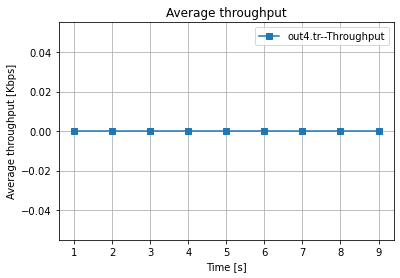

1.0   0.0
2.0   0.0
3.0   0.0
4.0   0.0
5.0   0.0
6.000218281   0.0
7.000327124   0.0
8.000345   0.0
9.00052069   0.0


In [5]:
#Throughput
throughput1=tr.Throughput(TRACE_FILENAME,'33')
throughput1.sample()#eedelay2.sample(1.5) for sampling with step=1.5
throughput1.plot()
#getting data
time=throughput1.time_sample
throughput=throughput1.throughput_sample
idx=0
for instant in time:
    print(instant,' ',throughput[idx]) 
    idx+=1

## Packet Transfer Ratio

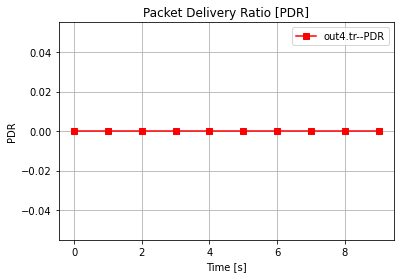

0   0
1.0   0
2.0   0
3.0   0
4.0   0
5.0   0
6.000218281   0
7.000327124   0
8.000345   0
9.00052069   0


In [6]:
#Packet Delivery Ratio
pdr1=tr.Pdr(TRACE_FILENAME,'33')
pdr1.sample()
pdr1.plot('sr-') #plotting with argument
#getting data
time=pdr1.time_sample
pdr=pdr1.pdr_sample
idx=0
for instant in time:
    print(instant,' ',pdr[idx]) 
    idx+=1

## Average End-to-End Delay

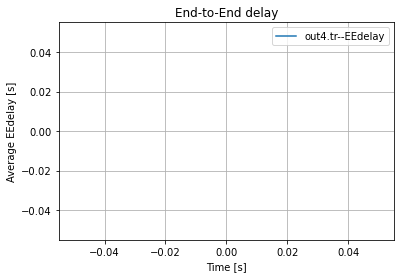

0   0


In [10]:
#end-to-end delay
# eedelay1=tr.Eedelay(TRACE_FILENAME,'33')
eedelay2=tr.Eedelay(TRACE_FILENAME,'33')
eedelay2.sample()#eedelay2.sample(1.5) for sampling with step=1.5.
eedelay2.plot()
# eedelay1.plot()
#getting data
time=eedelay2.time_sample
eedelay=eedelay2.eedelay_sample
idx=0
for instant in time:
    print(instant,' ',eedelay[idx]) 
    idx+=1